In [ ]:
#module importieren
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy
import os

from scipy.signal import find_peaks

In [ ]:
transit light curve

file struktur
<br>
-code.ipynb(dieser notebook)<br>
-1.txt<br>
-test/(lade ich später herunter)<br>
 &emsp;    -(40 txt files)<br>
-big/<br>
   &emsp;  -kepler_data_c03<br>
  &emsp; &emsp;       -(6k txt files)<br>


In [202]:
#.txt als csv lesen
df= pd.read_csv("1.txt",index_col=False)
df


,BJD - 2454833,Corrected Flux
0,2146.452489,1.000410
1,2146.513785,1.000296
2,2146.534218,1.000208
3,2146.554650,1.000183
4,2146.575082,1.000185
...,...,...
2908,2213.141474,1.002830
2909,2213.202769,1.002619
2910,2213.223201,1.002508
2911,2213.243632,1.002637


In [203]:
#julian zeit in tage umwandeln
'''
the_first=df[df.columns[0]][0]
for i in range(len(df[df.columns[1]])):
    print(df[df.columns[0]][i]-the_first)
    df[df.columns[0]][i]=df[df.columns[0]][i]-df[df.columns[0]][0]
df
'''

'\nthe_first=df[df.columns[0]][0]\nfor i in range(len(df[df.columns[1]])):\n    print(df[df.columns[0]][i]-the_first)\n    df[df.columns[0]][i]=df[df.columns[0]][i]-df[df.columns[0]][0]\ndf\n '

In [198]:
#julian zeit in tage umwandeln
#hardcoded
for i in range(len(df["BJD - 2454833"])):
    df["BJD - 2454833"][i]=df["BJD - 2454833"][i]-2146.452489051
df

,BJD - 2454833,Corrected Flux
0,0.000000,1.000410
1,0.061296,1.000296
2,0.081729,1.000208
3,0.102161,1.000183
4,0.122593,1.000185
...,...,...
2908,66.688985,1.002830
2909,66.750280,1.002619
2910,66.770712,1.002508
2911,66.791143,1.002637


Text(0.5, 0, 'days')

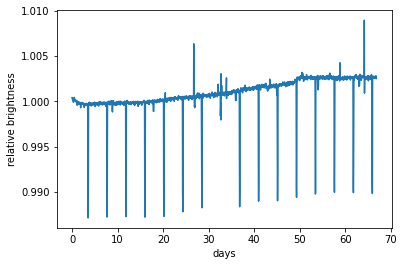

In [199]:
#der plot
plt.plot(df["BJD - 2454833"],df[" Corrected Flux"])
plt.ylabel("relative brightness")
plt.xlabel("days")

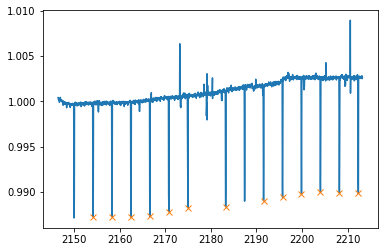

In [204]:
#peaks finden
x = df[df.columns[1]]

#find_peaks findet das locale maxima 
#distance-> minimale horizentale distanz, width->minimale breite der peaks, rel_height->wählt höhe zur breite, treshold-> vertikale distanz zur anderen peaks,prominace=wie prominant ist der peak
peaks, properties = find_peaks(-x,distance=160,width=0.5,rel_height=0.03,threshold=0.0001,prominence=0.01)
p=[]
for i in peaks:
    
    p.append(df[df.columns[0]][i])

plt.plot(df[df.columns[0]],df[df.columns[1]])

plt.plot(  p,x[peaks], "x")

plt.show()


In [191]:
#webscraping um die daten herunter zu laden
import requests
from bs4 import BeautifulSoup
 
url = 'https://lweb.cfa.harvard.edu/~avanderb/k2c3/'
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text, 'html.parser')
 
nums= []
for link in soup.find_all('a'):
    print(link.get('href'))
    if link.get('href')[0]=="e":
        nums.append(link.get('href')[2:-5])

?C=N;O=D
?C=M;O=A
?C=S;O=A
?C=D;O=A
/~avanderb/
ep205889250.html
ep205890696.html
ep205891576.html
ep205891848.html
ep205891876.html
ep205891958.html
ep205892108.html
ep205892281.html
ep205892667.html
ep205892677.html
ep205893085.html
ep205893214.html
ep205893469.html
ep205893603.html
ep205893702.html
ep205893858.html
ep205894004.html
ep205894358.html
ep205894941.html
ep205895081.html
ep205895090.html
ep205895252.html
ep205895680.html
ep205896070.html
ep205896106.html
ep205896226.html
ep205896348.html
ep205896459.html
ep205896499.html
ep205896601.html
ep205896721.html
ep205896738.html
ep205896803.html
ep205896873.html
ep205897043.html
ep205897059.html
ep205897280.html
ep205897389.html
ep205897543.html
ep205897774.html
ep205897829.html
ep205898099.html
ep205898160.html
ep205898238.html
ep205898439.html
ep205898454.html
ep205898527.html
ep205898849.html
ep205898872.html
ep205898882.html
ep205898894.html
ep205898942.html
ep205899208.html
ep205899250.html
ep205899663.html
ep205899671.html


ep205951029.html
ep205951113.html
ep205951125.html
ep205951131.html
ep205951216.html
ep205951233.html
ep205951306.html
ep205951383.html
ep205951387.html
ep205951420.html
ep205951484.html
ep205951485.html
ep205951502.html
ep205951504.html
ep205951609.html
ep205951628.html
ep205951715.html
ep205951739.html
ep205951753.html
ep205951778.html
ep205951794.html
ep205951808.html
ep205951880.html
ep205951993.html
ep205952023.html
ep205952084.html
ep205952090.html
ep205952128.html
ep205952135.html
ep205952139.html
ep205952210.html
ep205952295.html
ep205952309.html
ep205952324.html
ep205952359.html
ep205952383.html
ep205952424.html
ep205952497.html
ep205952500.html
ep205952539.html
ep205952590.html
ep205952605.html
ep205952648.html
ep205952655.html
ep205952682.html
ep205952749.html
ep205952775.html
ep205952790.html
ep205952803.html
ep205952809.html
ep205952817.html
ep205952839.html
ep205952853.html
ep205952863.html
ep205952868.html
ep205952869.html
ep205952874.html
ep205952875.html
ep205952892.ht

ep205982840.html
ep205982900.html
ep205982930.html
ep205983017.html
ep205983082.html
ep205983125.html
ep205983182.html
ep205983251.html
ep205983265.html
ep205983299.html
ep205983330.html
ep205983362.html
ep205983412.html
ep205983475.html
ep205983485.html
ep205983602.html
ep205983614.html
ep205983620.html
ep205983623.html
ep205983689.html
ep205983714.html
ep205983722.html
ep205983823.html
ep205983836.html
ep205983869.html
ep205983882.html
ep205983916.html
ep205984037.html
ep205984071.html
ep205984114.html
ep205984140.html
ep205984153.html
ep205984228.html
ep205984270.html
ep205984356.html
ep205984426.html
ep205984467.html
ep205984468.html
ep205984543.html
ep205984559.html
ep205984577.html
ep205984578.html
ep205984597.html
ep205984621.html
ep205984677.html
ep205984736.html
ep205984777.html
ep205984791.html
ep205984809.html
ep205984885.html
ep205984896.html
ep205984898.html
ep205984965.html
ep205984984.html
ep205985004.html
ep205985027.html
ep205985075.html
ep205985165.html
ep205985182.ht

ep206013104.html
ep206013138.html
ep206013158.html
ep206013179.html
ep206013231.html
ep206013238.html
ep206013241.html
ep206013255.html
ep206013288.html
ep206013301.html
ep206013306.html
ep206013332.html
ep206013344.html
ep206013346.html
ep206013351.html
ep206013367.html
ep206013419.html
ep206013430.html
ep206013466.html
ep206013511.html
ep206013540.html
ep206013548.html
ep206013581.html
ep206013588.html
ep206013596.html
ep206013597.html
ep206013606.html
ep206013627.html
ep206013643.html
ep206013660.html
ep206013676.html
ep206013697.html
ep206013698.html
ep206013705.html
ep206013709.html
ep206013729.html
ep206013733.html
ep206013771.html
ep206013776.html
ep206013819.html
ep206013821.html
ep206013839.html
ep206013893.html
ep206013896.html
ep206013913.html
ep206013918.html
ep206013919.html
ep206013991.html
ep206014003.html
ep206014020.html
ep206014025.html
ep206014033.html
ep206014045.html
ep206014074.html
ep206014077.html
ep206014091.html
ep206014097.html
ep206014107.html
ep206014112.ht

ep206041217.html
ep206041339.html
ep206041371.html
ep206041386.html
ep206041414.html
ep206041423.html
ep206041434.html
ep206041454.html
ep206041480.html
ep206041486.html
ep206041494.html
ep206041502.html
ep206041509.html
ep206041518.html
ep206041542.html
ep206041579.html
ep206041622.html
ep206041661.html
ep206041664.html
ep206041747.html
ep206041748.html
ep206041777.html
ep206041820.html
ep206041837.html
ep206041852.html
ep206041856.html
ep206041863.html
ep206041872.html
ep206041877.html
ep206041971.html
ep206041972.html
ep206041983.html
ep206042018.html
ep206042052.html
ep206042053.html
ep206042054.html
ep206042082.html
ep206042098.html
ep206042174.html
ep206042192.html
ep206042222.html
ep206042224.html
ep206042254.html
ep206042255.html
ep206042316.html
ep206042331.html
ep206042332.html
ep206042365.html
ep206042412.html
ep206042459.html
ep206042507.html
ep206042549.html
ep206042573.html
ep206042579.html
ep206042583.html
ep206042627.html
ep206042636.html
ep206042693.html
ep206042716.ht

ep206070250.html
ep206070251.html
ep206070270.html
ep206070319.html
ep206070333.html
ep206070334.html
ep206070335.html
ep206070377.html
ep206070413.html
ep206070505.html
ep206070517.html
ep206070568.html
ep206070627.html
ep206070703.html
ep206070719.html
ep206070739.html
ep206070746.html
ep206070824.html
ep206070852.html
ep206070864.html
ep206070882.html
ep206070970.html
ep206070993.html
ep206071041.html
ep206071061.html
ep206071070.html
ep206071125.html
ep206071231.html
ep206071278.html
ep206071377.html
ep206071402.html
ep206071410.html
ep206071429.html
ep206071432.html
ep206071478.html
ep206071501.html
ep206071555.html
ep206071743.html
ep206071779.html
ep206071838.html
ep206071929.html
ep206071932.html
ep206071938.html
ep206071963.html
ep206071995.html
ep206071999.html
ep206072007.html
ep206072116.html
ep206072151.html
ep206072213.html
ep206072215.html
ep206072228.html
ep206072254.html
ep206072294.html
ep206072346.html
ep206072377.html
ep206072393.html
ep206072463.html
ep206072506.ht

ep206100614.html
ep206100647.html
ep206100786.html
ep206100814.html
ep206100828.html
ep206100831.html
ep206100849.html
ep206100855.html
ep206100877.html
ep206100889.html
ep206100943.html
ep206100949.html
ep206100953.html
ep206100982.html
ep206100991.html
ep206101008.html
ep206101009.html
ep206101022.html
ep206101051.html
ep206101071.html
ep206101079.html
ep206101104.html
ep206101105.html
ep206101111.html
ep206101127.html
ep206101145.html
ep206101150.html
ep206101182.html
ep206101187.html
ep206101210.html
ep206101230.html
ep206101243.html
ep206101278.html
ep206101302.html
ep206101304.html
ep206101326.html
ep206101393.html
ep206101404.html
ep206101438.html
ep206101448.html
ep206101453.html
ep206101456.html
ep206101493.html
ep206101574.html
ep206101626.html
ep206101654.html
ep206101719.html
ep206101744.html
ep206101809.html
ep206101810.html
ep206101836.html
ep206101863.html
ep206101902.html
ep206101920.html
ep206101922.html
ep206101964.html
ep206102006.html
ep206102009.html
ep206102011.ht

ep206131867.html
ep206131948.html
ep206131975.html
ep206131981.html
ep206132013.html
ep206132041.html
ep206132092.html
ep206132194.html
ep206132246.html
ep206132304.html
ep206132308.html
ep206132311.html
ep206132377.html
ep206132405.html
ep206132430.html
ep206132433.html
ep206132435.html
ep206132447.html
ep206132490.html
ep206132515.html
ep206132534.html
ep206132563.html
ep206132581.html
ep206132582.html
ep206132610.html
ep206132629.html
ep206132632.html
ep206132642.html
ep206132705.html
ep206132710.html
ep206132739.html
ep206132743.html
ep206132770.html
ep206132790.html
ep206132828.html
ep206132857.html
ep206132887.html
ep206133054.html
ep206133061.html
ep206133080.html
ep206133103.html
ep206133114.html
ep206133199.html
ep206133225.html
ep206133284.html
ep206133309.html
ep206133310.html
ep206133321.html
ep206133322.html
ep206133362.html
ep206133377.html
ep206133468.html
ep206133515.html
ep206133520.html
ep206133588.html
ep206133595.html
ep206133603.html
ep206133624.html
ep206133632.ht

ep206162544.html
ep206162602.html
ep206162620.html
ep206162626.html
ep206162636.html
ep206162656.html
ep206162661.html
ep206162682.html
ep206162683.html
ep206162713.html
ep206162762.html
ep206162769.html
ep206162784.html
ep206162814.html
ep206162847.html
ep206162969.html
ep206163009.html
ep206163030.html
ep206163064.html
ep206163088.html
ep206163124.html
ep206163133.html
ep206163143.html
ep206163148.html
ep206163170.html
ep206163196.html
ep206163238.html
ep206163291.html
ep206163430.html
ep206163431.html
ep206163464.html
ep206163497.html
ep206163514.html
ep206163520.html
ep206163537.html
ep206163564.html
ep206163591.html
ep206163603.html
ep206163653.html
ep206163658.html
ep206163665.html
ep206163691.html
ep206163764.html
ep206163798.html
ep206163809.html
ep206163815.html
ep206163832.html
ep206163857.html
ep206163899.html
ep206163943.html
ep206164084.html
ep206164099.html
ep206164121.html
ep206164235.html
ep206164285.html
ep206164315.html
ep206164339.html
ep206164360.html
ep206164364.ht

ep206195460.html
ep206195500.html
ep206195559.html
ep206195568.html
ep206195807.html
ep206195829.html
ep206195831.html
ep206195983.html
ep206196016.html
ep206196080.html
ep206196127.html
ep206196135.html
ep206196162.html
ep206196187.html
ep206196194.html
ep206196214.html
ep206196216.html
ep206196259.html
ep206196295.html
ep206196315.html
ep206196377.html
ep206196455.html
ep206196533.html
ep206196581.html
ep206196661.html
ep206196669.html
ep206196672.html
ep206196737.html
ep206196890.html
ep206196925.html
ep206196938.html
ep206197016.html
ep206197069.html
ep206197086.html
ep206197119.html
ep206197208.html
ep206197260.html
ep206197360.html
ep206197364.html
ep206197413.html
ep206197476.html
ep206197487.html
ep206197546.html
ep206197572.html
ep206197620.html
ep206197677.html
ep206197715.html
ep206197750.html
ep206197831.html
ep206197844.html
ep206197955.html
ep206198002.html
ep206198028.html
ep206198066.html
ep206198165.html
ep206198223.html
ep206198311.html
ep206198334.html
ep206198341.ht

ep206232100.html
ep206232149.html
ep206232196.html
ep206232200.html
ep206232256.html
ep206232320.html
ep206232406.html
ep206232435.html
ep206232486.html
ep206232491.html
ep206232509.html
ep206232512.html
ep206232546.html
ep206232558.html
ep206232575.html
ep206232613.html
ep206232616.html
ep206232694.html
ep206232705.html
ep206232732.html
ep206232743.html
ep206232745.html
ep206232769.html
ep206232803.html
ep206232817.html
ep206232833.html
ep206232895.html
ep206232940.html
ep206232994.html
ep206233026.html
ep206233094.html
ep206233120.html
ep206233183.html
ep206233187.html
ep206233210.html
ep206233222.html
ep206233297.html
ep206233331.html
ep206233343.html
ep206233365.html
ep206233398.html
ep206233419.html
ep206233425.html
ep206233462.html
ep206233466.html
ep206233472.html
ep206233496.html
ep206233544.html
ep206233551.html
ep206233615.html
ep206233629.html
ep206233738.html
ep206233778.html
ep206233780.html
ep206233815.html
ep206233837.html
ep206233887.html
ep206233918.html
ep206233979.ht

ep206269268.html
ep206269311.html
ep206269337.html
ep206269339.html
ep206269344.html
ep206269373.html
ep206269393.html
ep206269407.html
ep206269415.html
ep206269422.html
ep206269425.html
ep206269706.html
ep206269742.html
ep206269759.html
ep206269779.html
ep206269888.html
ep206269891.html
ep206270180.html
ep206270185.html
ep206270203.html
ep206270259.html
ep206270298.html
ep206270300.html
ep206270336.html
ep206270383.html
ep206270443.html
ep206270446.html
ep206270469.html
ep206270503.html
ep206270542.html
ep206270613.html
ep206270648.html
ep206270701.html
ep206270755.html
ep206270947.html
ep206270974.html
ep206271019.html
ep206271027.html
ep206271029.html
ep206271103.html
ep206271132.html
ep206271186.html
ep206271211.html
ep206271253.html
ep206271341.html
ep206271388.html
ep206271510.html
ep206271555.html
ep206271606.html
ep206271712.html
ep206271736.html
ep206271852.html
ep206271878.html
ep206271906.html
ep206271948.html
ep206271965.html
ep206272028.html
ep206272120.html
ep206272271.ht

ep206316363.html
ep206316513.html
ep206316605.html
ep206316611.html
ep206316632.html
ep206316725.html
ep206316839.html
ep206316898.html
ep206316952.html
ep206316982.html
ep206317011.html
ep206317286.html
ep206317300.html
ep206317340.html
ep206317514.html
ep206317629.html
ep206317703.html
ep206317761.html
ep206317825.html
ep206317845.html
ep206318003.html
ep206318071.html
ep206318088.html
ep206318097.html
ep206318144.html
ep206318147.html
ep206318276.html
ep206318379.html
ep206318421.html
ep206318433.html
ep206318489.html
ep206318555.html
ep206318617.html
ep206318677.html
ep206318716.html
ep206318724.html
ep206318776.html
ep206318799.html
ep206318969.html
ep206319008.html
ep206319102.html
ep206319151.html
ep206319174.html
ep206319406.html
ep206319414.html
ep206319431.html
ep206319458.html
ep206319651.html
ep206319659.html
ep206319777.html
ep206319937.html
ep206319939.html
ep206319951.html
ep206320039.html
ep206320062.html
ep206320151.html
ep206320171.html
ep206320221.html
ep206320258.ht

ep206371409.html
ep206371423.html
ep206371445.html
ep206371446.html
ep206371449.html
ep206371473.html
ep206371591.html
ep206371648.html
ep206371744.html
ep206371768.html
ep206371808.html
ep206371837.html
ep206371868.html
ep206372044.html
ep206372151.html
ep206372709.html
ep206372760.html
ep206372786.html
ep206372998.html
ep206373024.html
ep206373144.html
ep206373160.html
ep206373188.html
ep206373201.html
ep206373225.html
ep206373378.html
ep206373384.html
ep206373423.html
ep206373473.html
ep206373629.html
ep206373693.html
ep206373777.html
ep206373834.html
ep206373878.html
ep206373989.html
ep206373997.html
ep206373999.html
ep206374038.html
ep206374047.html
ep206374128.html
ep206374140.html
ep206374153.html
ep206374221.html
ep206374292.html
ep206374319.html
ep206374327.html
ep206374393.html
ep206374395.html
ep206374404.html
ep206374406.html
ep206374555.html
ep206374571.html
ep206374685.html
ep206374874.html
ep206374886.html
ep206374969.html
ep206374987.html
ep206375014.html
ep206375071.ht

ep206422161.html
ep206422172.html
ep206422248.html
ep206422387.html
ep206422420.html
ep206422510.html
ep206422523.html
ep206422539.html
ep206422604.html
ep206422633.html
ep206422648.html
ep206422773.html
ep206422794.html
ep206422864.html
ep206422867.html
ep206422889.html
ep206422976.html
ep206422979.html
ep206423003.html
ep206423015.html
ep206423021.html
ep206423158.html
ep206423236.html
ep206423285.html
ep206423358.html
ep206423388.html
ep206423408.html
ep206423420.html
ep206423421.html
ep206423478.html
ep206423505.html
ep206423508.html
ep206423526.html
ep206423687.html
ep206423760.html
ep206423770.html
ep206423904.html
ep206423922.html
ep206423989.html
ep206424033.html
ep206424047.html
ep206424074.html
ep206424101.html
ep206424158.html
ep206424214.html
ep206424245.html
ep206424254.html
ep206424306.html
ep206424389.html
ep206424440.html
ep206424443.html
ep206424481.html
ep206424562.html
ep206424599.html
ep206424684.html
ep206424731.html
ep206424780.html
ep206424802.html
ep206424855.ht

ep206472377.html
ep206472405.html
ep206472442.html
ep206472452.html
ep206472458.html
ep206472474.html
ep206472487.html
ep206472563.html
ep206472628.html
ep206472642.html
ep206472650.html
ep206472656.html
ep206472801.html
ep206472814.html
ep206472820.html
ep206472995.html
ep206473090.html
ep206473103.html
ep206473147.html
ep206473193.html
ep206473308.html
ep206473386.html
ep206473426.html
ep206473451.html
ep206473503.html
ep206473505.html
ep206473544.html
ep206473705.html
ep206473726.html
ep206473868.html
ep206473876.html
ep206473960.html
ep206473982.html
ep206473993.html
ep206474002.html
ep206474003.html
ep206474004.html
ep206474041.html
ep206474186.html
ep206474230.html
ep206474257.html
ep206474261.html
ep206474266.html
ep206474289.html
ep206474337.html
ep206474395.html
ep206474485.html
ep206474606.html
ep206474637.html
ep206474695.html
ep206474765.html
ep206474784.html
ep206474831.html
ep206474944.html
ep206474996.html
ep206474997.html
ep206475021.html
ep206475056.html
ep206475150.ht

ep206534408.html
ep206534429.html
ep206534619.html
ep206534627.html
ep206534668.html
ep206534673.html
ep206534757.html
ep206534889.html
ep206534929.html
ep206535016.html
ep206535099.html
ep206535467.html
ep206535512.html
ep206535594.html
ep206535618.html
ep206535715.html
ep206535752.html
ep206535848.html
ep206535891.html
ep206535910.html
ep206536162.html
ep206536233.html
ep206536238.html
ep206536279.html
ep206536289.html
ep206536335.html
ep206536781.html
ep206536909.html
ep206537083.html
ep206537242.html
ep206537267.html
ep206537457.html
ep206537674.html
ep206537788.html
ep206537878.html
ep206537893.html
ep206537976.html
ep206538212.html
ep206538217.html
ep206538307.html
ep206538362.html
ep206538409.html
ep206538506.html
ep206538538.html
ep206538751.html
ep206538850.html
ep206538918.html
ep206539096.html
ep206539360.html
ep206539364.html
ep206539460.html
ep206539841.html
ep206540110.html
ep206540114.html
ep206540311.html
ep206540338.html
ep206540445.html
ep206540447.html
ep206540710.ht

In [192]:
#die ersten 40 herunterladen
for i in nums[:40]:
        
        link="https://archive.stsci.edu/missions/hlsp/k2sff/c03/205800000/"+i[4:]+"/hlsp_k2sff_k2_lightcurve_"+i+"-c03_kepler_v1_llc-default-aper.txt"
        downloaded_obj = requests.get(link)
        print(link)
        with open("test/"+i+".txt", "wb") as file:
            file.write(downloaded_obj.content)

            

https://archive.stsci.edu/missions/hlsp/k2sff/c03/205800000/89250/hlsp_k2sff_k2_lightcurve_205889250-c03_kepler_v1_llc-default-aper.txt
https://archive.stsci.edu/missions/hlsp/k2sff/c03/205800000/90696/hlsp_k2sff_k2_lightcurve_205890696-c03_kepler_v1_llc-default-aper.txt
https://archive.stsci.edu/missions/hlsp/k2sff/c03/205800000/91576/hlsp_k2sff_k2_lightcurve_205891576-c03_kepler_v1_llc-default-aper.txt
https://archive.stsci.edu/missions/hlsp/k2sff/c03/205800000/91848/hlsp_k2sff_k2_lightcurve_205891848-c03_kepler_v1_llc-default-aper.txt
https://archive.stsci.edu/missions/hlsp/k2sff/c03/205800000/91876/hlsp_k2sff_k2_lightcurve_205891876-c03_kepler_v1_llc-default-aper.txt
https://archive.stsci.edu/missions/hlsp/k2sff/c03/205800000/91958/hlsp_k2sff_k2_lightcurve_205891958-c03_kepler_v1_llc-default-aper.txt
https://archive.stsci.edu/missions/hlsp/k2sff/c03/205800000/92108/hlsp_k2sff_k2_lightcurve_205892108-c03_kepler_v1_llc-default-aper.txt
https://archive.stsci.edu/missions/hlsp/k2sff/c0

nah


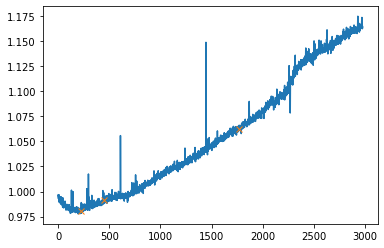

nah


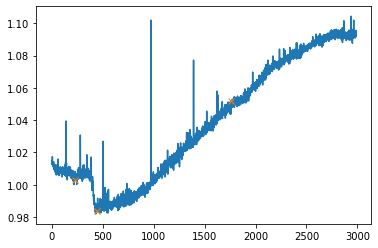

nah


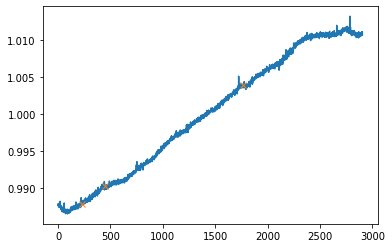

nah


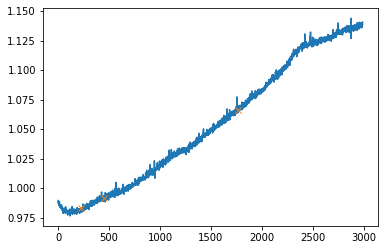

nah


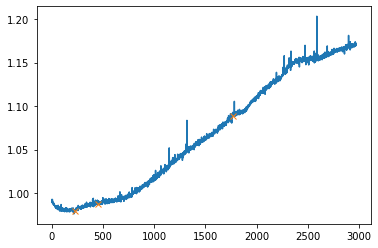

nah


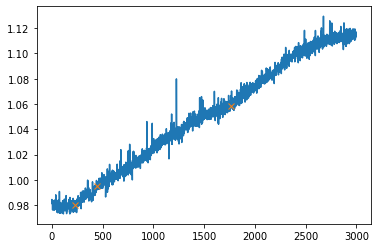

nah


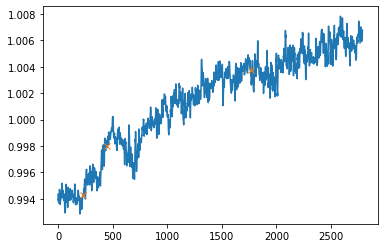

nah


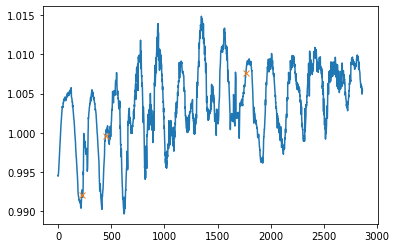

nah


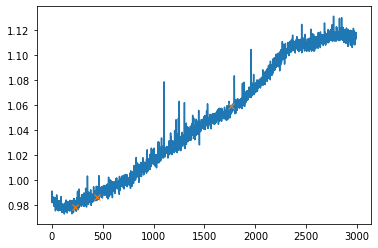

nah


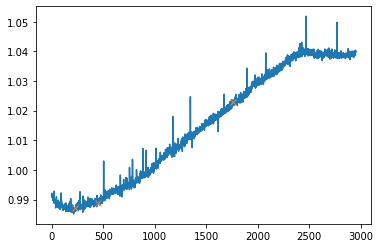

nah


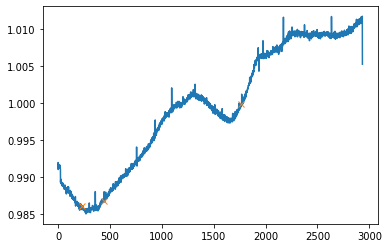

exoplanet


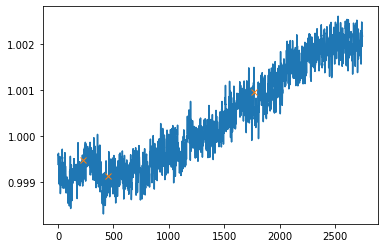

exoplanet


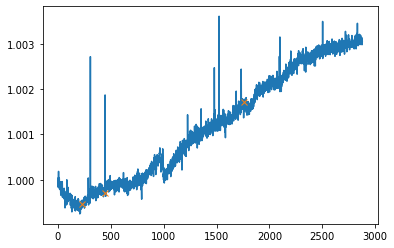

nah


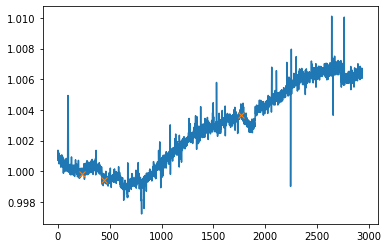

nah


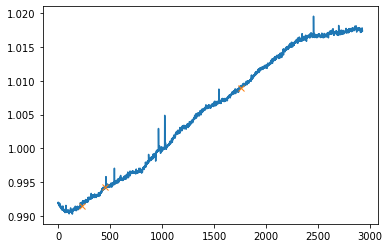

nah


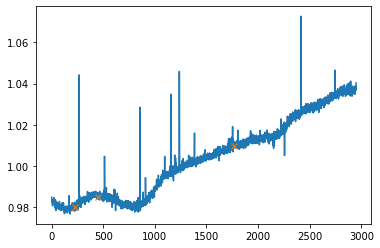

nah


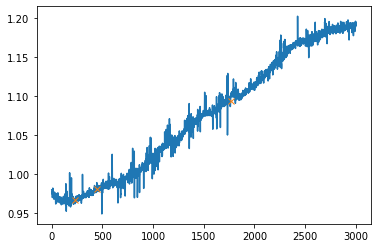

nah


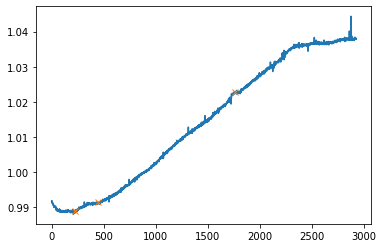

nah


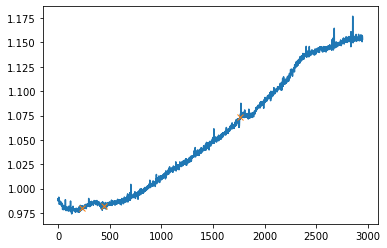

nah


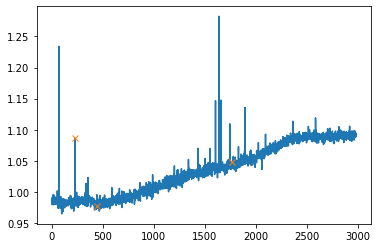

nah


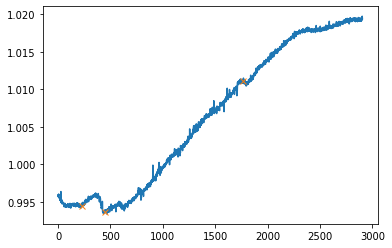

exoplanet


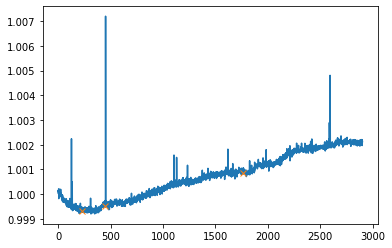

nah


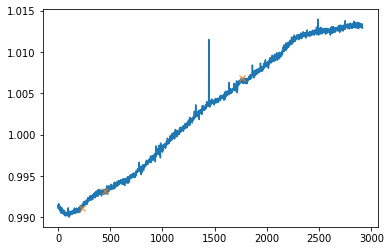

nah


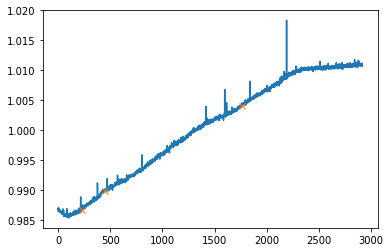

exoplanet


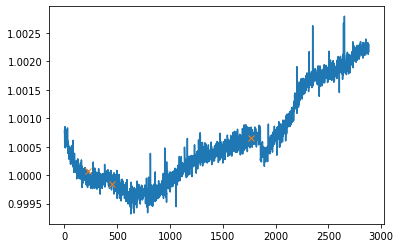

exoplanet


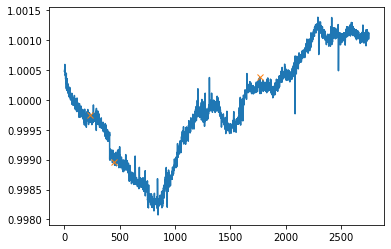

nah


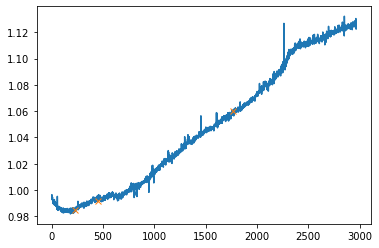

exoplanet


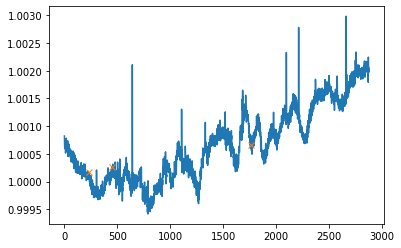

nah


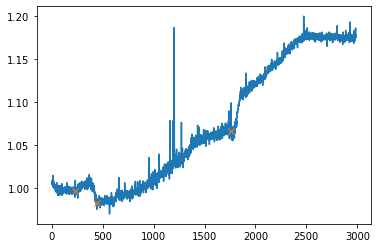

nah


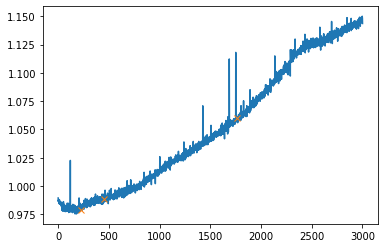

nah


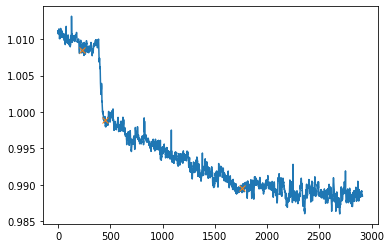

nah


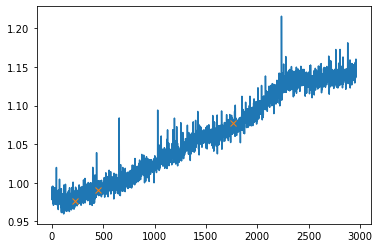

nah


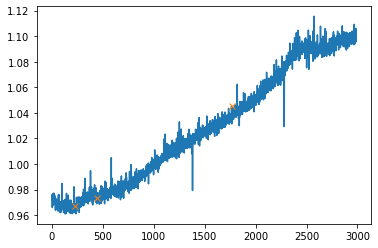

nah


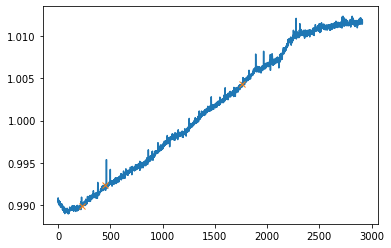

exoplanet


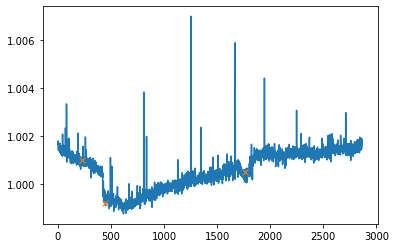

nah


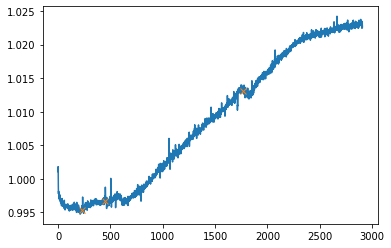

nah


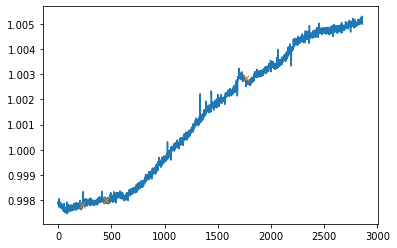

nah


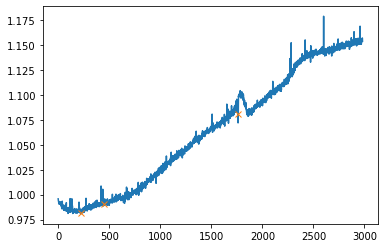

exoplanet


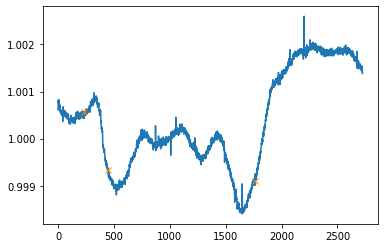

nah


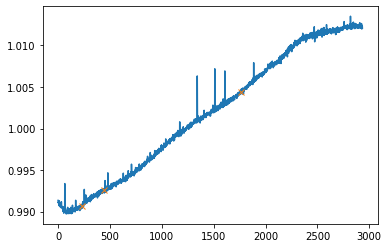

In [193]:
for i in nums[:40]:
    
    df2=pd.read_csv("test/"+i+".txt",index_col=False)
    
    x = df2[df2.columns[1]]
    data = df2[df2.columns[0]]
    
    peaks, properties = find_peaks(-X ,distance=160,width=(0.3,3),rel_height=0.03,threshold=0.0001,prominence=0.012)#parameters definieren

    if len(peaks)>2 and np.std(x[peaks])<0.0012:
        print("exoplanet")
        


    else:
        print("nah")
    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")
    plt.show()
    




   
    

exoplanet


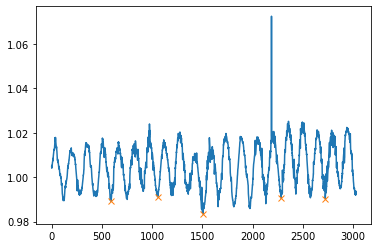

exoplanet


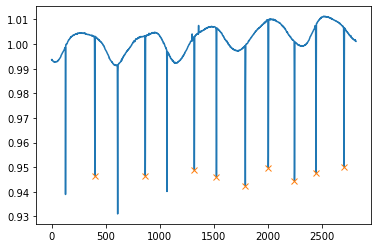

exoplanet


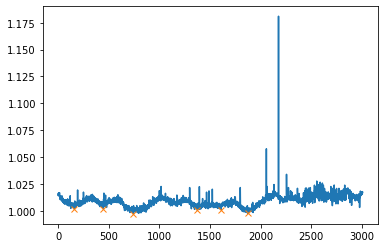

exoplanet


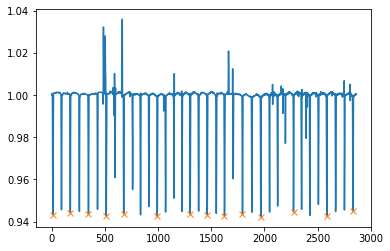

exoplanet


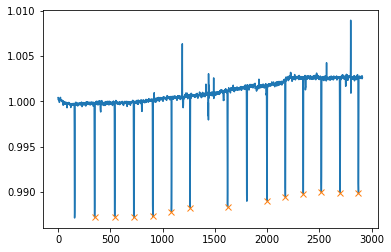

In [206]:
trues=[]
for i in os.listdir('big/kepler_data_c03'):
    
    df_temp=pd.read_csv('big/kepler_data_c03/'+i,index_col=False)
    
    X = df_temp[df_temp.columns[1]]
    data = df_temp[df_temp.columns[0]]
    val=True
    
        
    peaks, properties = find_peaks(-X ,distance=160,width=(0.3,3),rel_height=0.03,threshold=0.0001,prominence=0.012)#parameters definieren
    for j in X[peaks]:
        if j > np.percentile(df_temp, 5):
            val=False

    if len(X[peaks])>4 and val==True and np.std(X[peaks])<0.003:
        trues.append(i)
        print("exoplanet")
        plt.plot(X)
        plt.plot(peaks, X[peaks], "x")
        plt.show()
        


    
    
    

In [ ]:
trues

exoplanet


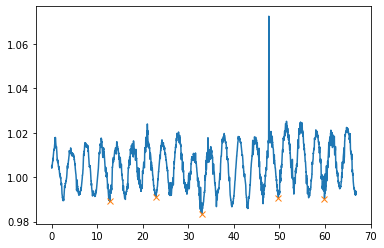

exoplanet


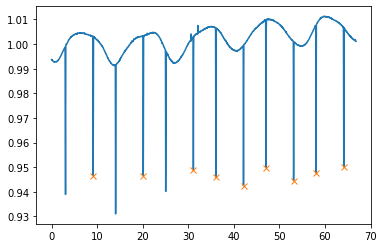

exoplanet


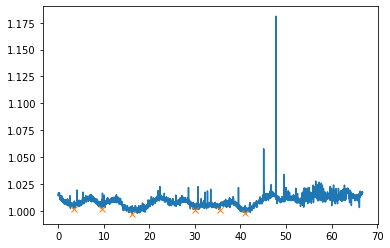

exoplanet


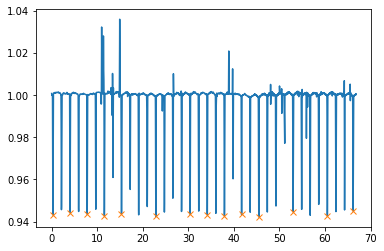

exoplanet


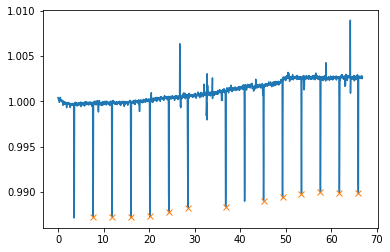

In [205]:
trues=[]
for i in os.listdir('big/kepler_data_c03'):
    
    df_temp=pd.read_csv('big/kepler_data_c03/'+i,index_col=False)
    
    X = df_temp[df_temp.columns[1]]
    data = df_temp[df_temp.columns[0]]
    val=True
    
        
    peaks, properties = find_peaks(-X ,distance=160,width=(0.3,3),rel_height=0.03,threshold=0.0001,prominence=0.012)#parameters definieren
    for j in X[peaks]:
        if j > np.percentile(df_temp, 5):
            val=False

    if len(X[peaks])>4 and val==True and np.std(X[peaks])<0.003:
        the_first=df_temp[df_temp.columns[0]][0]
        for i in range(len(df_temp[df_temp.columns[1]])):
       
            df_temp[df_temp.columns[0]][i]=df_temp[df_temp.columns[0]][i]-the_first

        peaks, properties = find_peaks(-X ,distance=160,width=(0.3,3),rel_height=0.03,threshold=0.0001,prominence=0.012)
        p=[]
        for i in peaks:

            p.append(df_temp[df_temp.columns[0]][i])
    
        
        trues.append(i)
        print("exoplanet")
        plt.plot(df_temp[df_temp.columns[0]],df_temp[df_temp.columns[1]])

        plt.plot(  p,df_temp[df_temp.columns[1]][peaks], "x")
        plt.show()
        